In [168]:
import csv
import pandas as pd
import os

In [169]:
human_df=pd.read_csv('/tscc/projects/ps-yeolab3/yumei/090524_hipsc_added_seq/rsem_output/DMSO_SynapseVsLysate_merged_results_human_genes.csv')
print (human_df)

human_synapse=human_df[(human_df['logFC']>1) & (human_df['PValue']<0.05)]
print (human_synapse)

       Unnamed: 0    gene_id_clean          gene_id     logFC    logCPM  \
0               1  ENSG00000000003  ENSG00000000003  0.745908  2.863099   
1               2  ENSG00000000419  ENSG00000000419 -0.196115  4.476127   
2               3  ENSG00000000457  ENSG00000000457 -0.626138  4.262351   
3               4  ENSG00000000460  ENSG00000000460 -1.862999  1.971757   
4               5  ENSG00000001036  ENSG00000001036  1.010138  4.637360   
...           ...              ...              ...       ...       ...   
13633       13634  ENSG00000292348  ENSG00000292348  1.165757  2.114421   
13634       13635  ENSG00000292358  ENSG00000292358 -0.853097  3.736020   
13635       13636  ENSG00000292363  ENSG00000292363 -0.106594  1.160711   
13636       13637  ENSG00000292366  ENSG00000292366  0.127059  2.947993   
13637       13638  ENSG00000292372  ENSG00000292372 -1.591685  4.940021   

               F        PValue           FDR       transcript_id  \
0      24.531854  3.766895e-05 

In [170]:
cx_dmso_synapse_df=pd.read_csv('/tscc/projects/ps-yeolab3/yumei/090524_hipsc_added_seq/rsem_output/CX_SynapsevsDMSO_Synapse_results_human.csv')

In [171]:
human_synapse_genes=human_synapse['gene_id'].tolist()
#print (len(human_synapse_genes))

human_synapse_df = cx_dmso_synapse_df[cx_dmso_synapse_df['gene_id'].isin(human_synapse_genes)]
#print (human_synapse_df)
human_synapse_logFC=human_synapse_df['logFC'].tolist()
print (human_synapse_logFC[:5])

[0.0758108184741609, -0.370234553556343, -0.186692714747721, -1.12185367814051, -0.0723962490550764]


In [172]:
all_genes=cx_dmso_synapse_df['gene_id'].tolist()

rest_genes=list(set(all_genes)-set(human_synapse_genes))
print (len(rest_genes))

rest_df = cx_dmso_synapse_df[cx_dmso_synapse_df['gene_id'].isin(rest_genes)]
#print (human_synapse_df)
rest_logFC=rest_df['logFC'].tolist()
print (rest_logFC[:5])

12531
[0.0728787290896695, 0.578730761457206, 0.962202949749021, 1.66490887651326, -0.280701916806088]


In [173]:
from scipy import stats
import numpy as np

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(human_synapse_logFC, rest_logFC)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Calculate effect size (Cohen's d)
mean_diff = np.mean(human_synapse_logFC) - np.mean(rest_logFC)
n1, n2 = len(human_synapse_logFC), len(rest_logFC)
pooled_std = np.sqrt(((n1 - 1) * np.std(human_synapse_logFC, ddof=1)**2 + 
                      (n2 - 1) * np.std(rest_logFC, ddof=1)**2) / 
                     (n1 + n2 - 2))
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d}")

T-statistic: -22.67522838030898
P-value: 9.064678697657887e-112
Cohen's d: -0.7109848349808524


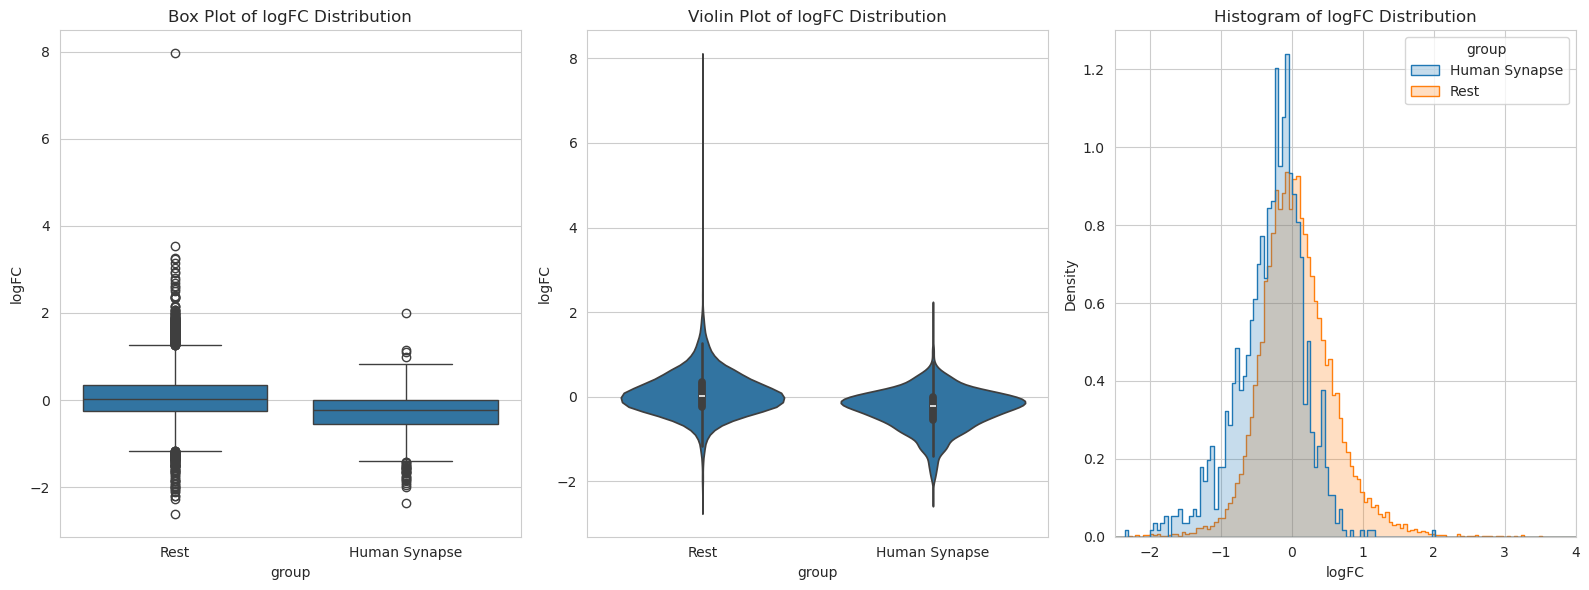

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']  # Reversed order

# Set up the plot style
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Create a box plot with specified order
plt.subplot(131)
sns.boxplot(x='group', y='logFC', data=df, order=order)
#plt.ylim(-2.5, 4)
plt.title('Box Plot of logFC Distribution')

# Create a violin plot with specified order
plt.subplot(132)
sns.violinplot(x='group', y='logFC', data=df, order=order)
#plt.ylim(-2.5, 9)
plt.title('Violin Plot of logFC Distribution')

# Create a histogram
plt.subplot(133)
sns.histplot(data=df, x='logFC', hue='group', element='step', stat='density', common_norm=False)
plt.xlim(-2.5, 4)
plt.title('Histogram of logFC Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Rest of the statistical analysis remains the same...

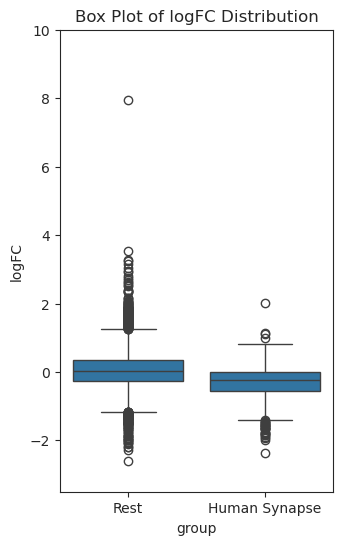

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("ticks")  # Changed from "whitegrid" to "ticks"

# Create a box plot with specified order
plt.subplot(131)
sns.boxplot(x='group', y='logFC', data=df, order=order)
plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5,10)

# Remove grid
plt.grid(False)

# Save as PDF
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_boxplot_logFC.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

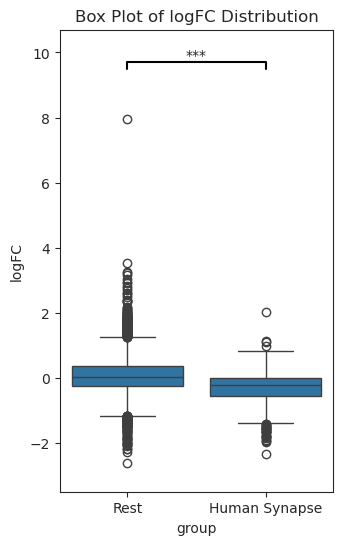

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats  # This should be available in most scientific Python environments

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("ticks")

# Create a box plot with specified order
plt.subplot(131)
ax = sns.boxplot(x='group', y='logFC', data=df, order=order)

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Get positions for the bars
x1, x2 = 0, 1  # Positions for 'Rest' and 'Human Synapse'
y = max(df['logFC'].max(), 9) + 0.5  # Position for the bar, above the highest point or above your ylim

# Plot the significance bar
bar_height = 0.2
plt.plot([x1, x1, x2, x2], [y, y + bar_height, y + bar_height, y], lw=1.5, c='black')

# Add p-value text
if p_value < 0.001:
    text = "***"  # or "p < 0.001"
elif p_value < 0.01:
    text = "**"   # or "p < 0.01"
elif p_value < 0.05:
    text = "*"    # or "p < 0.05"
else:
    text = "ns"   # or f"p = {p_value:.3f}"

plt.text((x1 + x2) / 2, y + bar_height, text, ha='center', va='bottom')

plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5, y + bar_height + 1)  # Adjust ylim to fit the significance bar
plt.grid(False)

# Save as PDF
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_boxplot_logFC.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

/tmp/ipykernel_1975565/1166812442.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)


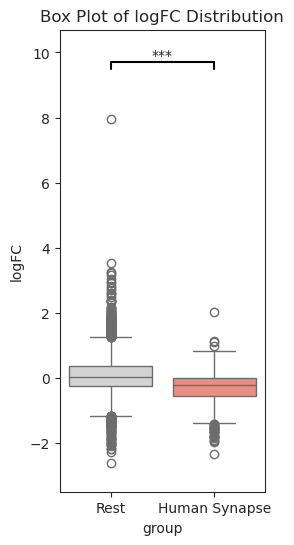

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style
plt.figure(figsize=(9, 6))
sns.set_style("ticks")

# Create a box plot with specified order and custom palette
# Create a color palette with 'lightgray' for 'Rest' and 'salmon' for 'Human Synapse'
palette = {'Rest': 'lightgray', 'Human Synapse': 'salmon'}

# Create a box plot with specified order and custom palette
plt.subplot(131)
ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Get positions for the bars
x1, x2 = 0, 1  # Positions for 'Rest' and 'Human Synapse'
y = max(df['logFC'].max(), 9) + 0.5  # Position for the bar, above the highest point or above your ylim

# Plot the significance bar
bar_height = 0.2
plt.plot([x1, x1, x2, x2], [y, y + bar_height, y + bar_height, y], lw=1.5, c='black')

# Add p-value text
if p_value < 0.001:
    text = "***"  # or "p < 0.001"
elif p_value < 0.01:
    text = "**"   # or "p < 0.01"
elif p_value < 0.05:
    text = "*"    # or "p < 0.05"
else:
    text = "ns"   # or f"p = {p_value:.3f}"

plt.text((x1 + x2) / 2, y + bar_height, text, ha='center', va='bottom')

plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5, y + bar_height + 1)  # Adjust ylim to fit the significance bar
plt.grid(False)

# Save as SVG instead of PDF
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_boxplot_logFC.svg', 
            format='svg', 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

/tmp/ipykernel_1975565/4000437777.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)


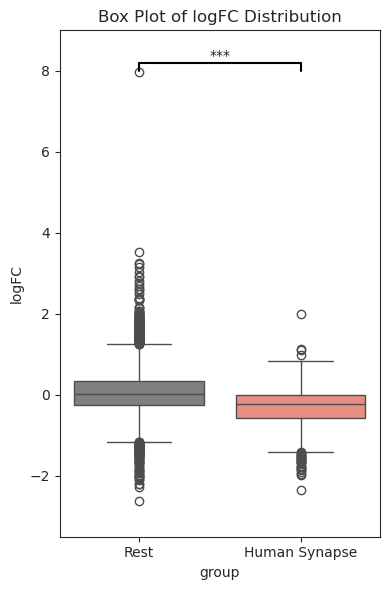

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style with a wider and shorter figure
plt.figure(figsize=(4, 6))
sns.set_style("ticks")

# Create a box plot with specified order and custom palette
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}
ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Find the maximum data point for proper spacing
max_data_point = df['logFC'].max()

# Get positions for the bars, ensuring it's higher than the max data point
x1, x2 = 0, 1  # Positions for 'Rest' and 'Human Synapse'
y = max_data_point + 1  # Position bar 0.5 units above the highest data point

# Make sure the bar still fits within y-limit of 9
if y > 8:
    y = 8  # Cap at 8 to leave room for the text within ylim=9

# Plot the significance bar
bar_height = 0.2
plt.plot([x1, x1, x2, x2], [y, y + bar_height, y + bar_height, y], lw=1.5, c='black')

# Add p-value text
if p_value < 0.001:
    text = "***"
elif p_value < 0.01:
    text = "**"
elif p_value < 0.05:
    text = "*"
else:
    text = "ns"
    
plt.text((x1 + x2) / 2, y + bar_height, text, ha='center', va='bottom')

plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5, 9)  # Fixed ylim at 9
#plt.yscale('log')
plt.grid(False)

# Save as SVG
plt.tight_layout()
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_boxplot_logFC.svg', 
            format='svg', 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

/tmp/ipykernel_1975565/1027265616.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
/tmp/ipykernel_1975565/1027265616.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)


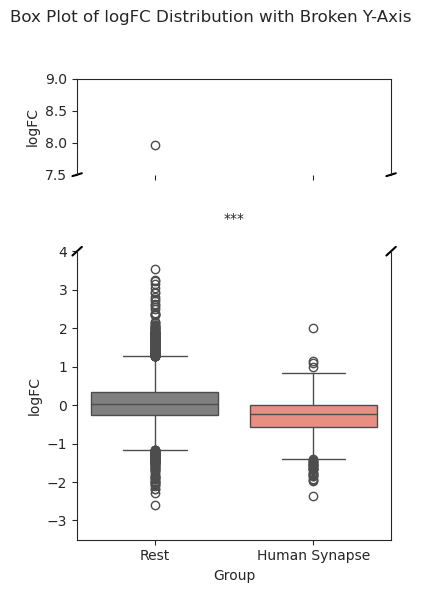

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': np.concatenate([human_synapse_logFC, rest_logFC]),
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Create two subplots that share the x-axis
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(4, 6),
                                          gridspec_kw={'height_ratios': [1, 3]})

# Plot the boxplot in both axes
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)

# Set y-axis limits for the two subplots
ax_top.set_ylim(7.5, 9)    # For the outlier region
ax_bottom.set_ylim(-3.5, 4)  # For the main distribution

# Remove the spines between the plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)  # don't show tick labels on the top plot
ax_bottom.xaxis.tick_bottom()

# Add diagonal break marks
d = 0.015  # size of the break marks in axes coordinates
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left break mark
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)    # top-right break mark

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left break mark
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right break mark

# Optionally, you might want to draw the significance bar on the top plot
x1, x2 = 0, 1  # Positions for the groups on the x-axis
# Determine a y position on the top plot for the significance bar
y = 6.5  
bar_height = 0.2
ax_top.plot([x1, x1, x2, x2], [y, y + bar_height, y + bar_height, y], lw=1.5, c='black')

# Add significance text
if p_value < 0.001:
    text = "***"
elif p_value < 0.01:
    text = "**"
elif p_value < 0.05:
    text = "*"
else:
    text = "ns"
ax_top.text((x1 + x2) / 2, y + bar_height, text, ha='center', va='bottom')

# Set title and labels
plt.suptitle('Box Plot of logFC Distribution with Broken Y-Axis')
plt.xlabel('Group')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_1975565/3180855329.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
/tmp/ipykernel_1975565/3180855329.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)
/tmp/ipykernel_1975565/3180855329.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


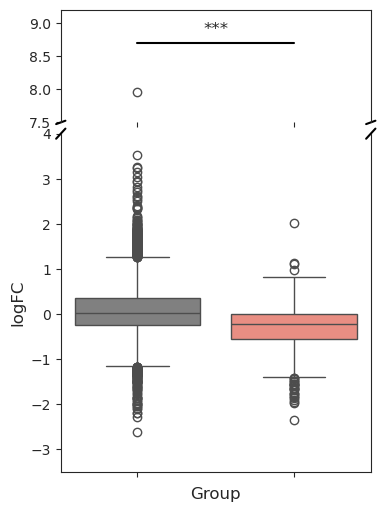

P-value: 9.0647e-112


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': np.concatenate([human_synapse_logFC, rest_logFC]),
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Create two subplots that share the x-axis with tighter spacing
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(4, 6),
                                       gridspec_kw={'height_ratios': [1, 3], 
                                                   'hspace': 0.05})  # Reduce vertical space between plots

# Plot the boxplot in both axes
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)

# Set y-axis limits for the two subplots - adjust top limit to make room for sig bar
ax_top.set_ylim(7.5, 9.2)    # For the outlier region (increased upper limit)
ax_bottom.set_ylim(-3.5, 4)  # For the main distribution

# Remove the spines between the plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)  # don't show tick labels on the top plot
ax_bottom.xaxis.tick_bottom()

# Add diagonal break marks
d = 0.015  # size of the break marks in axes coordinates
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left break mark
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)    # top-right break mark
kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left break mark
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right break mark

# Add a significance bar to the top plot above the outlier
x1, x2 = 0, 1  # Positions for the groups on the x-axis
y = 8.7  # Position for significance bar (above the outlier in the top plot)
ax_top.plot([x1, x2], [y, y], lw=1.5, c='black')  # Horizontal line

# Add significance text
if p_value < 0.001:
    text = "***"
elif p_value < 0.01:
    text = "**"
elif p_value < 0.05:
    text = "*"
else:
    text = "ns"
ax_top.text((x1 + x2) / 2, y + 0.1, text, ha='center', va='bottom', fontsize=12)

# Only show y-axis label on bottom plot
ax_top.set_ylabel('')
ax_bottom.set_ylabel('logFC', fontsize=12)

# Remove x-axis label from top plot
ax_top.set_xlabel('')

# Hide x-tick labels on top plot
ax_top.set_xticklabels([])

# Set x-label on bottom plot
ax_bottom.set_xlabel('Group', fontsize=12)

# Remove grid on both plots
ax_top.grid(False)
ax_bottom.grid(False)

# Adjust tick label size
ax_bottom.tick_params(axis='both', which='major', labelsize=10)
ax_top.tick_params(axis='y', which='major', labelsize=10)

# Tight layout
plt.tight_layout()

# Save if needed
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_boxplot_logFC.svg', 
             format='svg', 
            dpi=300, 
             bbox_inches='tight',
             transparent=True)

plt.show()

# Print the p-value
print(f"P-value: {p_value:.4e}")

/tmp/ipykernel_1975565/2061838529.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
/tmp/ipykernel_1975565/2061838529.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)


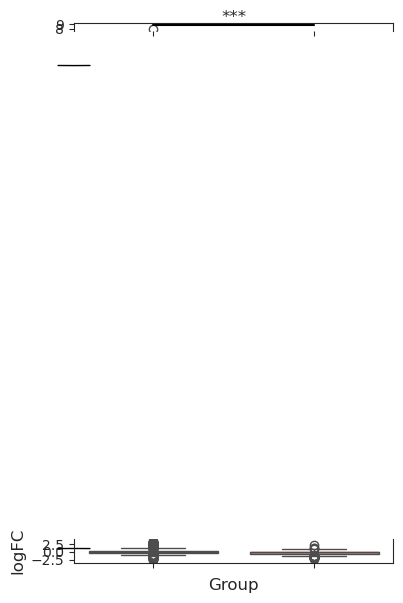

P-value: 9.0647e-112


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': np.concatenate([human_synapse_logFC, rest_logFC]),
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Create two subplots that share the x-axis with a small gap between
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(4, 6),
                                       gridspec_kw={'height_ratios': [1, 3]})

# Add some space between the panels to make the break more obvious
plt.subplots_adjust(hspace=0.1)

# Plot the boxplot in both axes
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)

# Set y-axis limits for the two subplots - adjust top limit to make room for sig bar
ax_top.set_ylim(7.5, 9.2)    # For the outlier region (increased upper limit)
ax_bottom.set_ylim(-3.5, 4)  # For the main distribution

# Remove the spines between the plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)  # don't show tick labels on the top plot
ax_bottom.xaxis.tick_bottom()

# Add break indicators on y-axis only to avoid confusion with data points
d = 0.05  # size of break indicator
# Get position of left spine (y-axis)
spine_pos = 0  # This is the x-coordinate of the y-axis in data coordinates

# Draw zigzag lines on the y-axis area
# For top plot (bottom of axis)
ax_top.plot([-d, 0, d], [-0.02, -0.04, -0.02], transform=ax_top.get_yaxis_transform(), 
           color='k', clip_on=False, lw=1)

# For bottom plot (top of axis)
ax_bottom.plot([-d, 0, d], [1.02, 1.04, 1.02], transform=ax_bottom.get_yaxis_transform(), 
              color='k', clip_on=False, lw=1)

# Add a significance bar to the top plot above the outlier
x1, x2 = 0, 1  # Positions for the groups on the x-axis
y = 8.7  # Position for significance bar (above the outlier in the top plot)
ax_top.plot([x1, x2], [y, y], lw=1.5, c='black')  # Horizontal line

# Add significance text
if p_value < 0.001:
    text = "***"
elif p_value < 0.01:
    text = "**"
elif p_value < 0.05:
    text = "*"
else:
    text = "ns"
ax_top.text((x1 + x2) / 2, y + 0.1, text, ha='center', va='bottom', fontsize=12)

# Only show y-axis label on bottom plot
ax_top.set_ylabel('')
ax_bottom.set_ylabel('logFC', fontsize=12)

# Remove x-axis label from top plot
ax_top.set_xlabel('')

# Hide x-tick labels on top plot
ax_top.set_xticklabels([])

# Set x-label on bottom plot
ax_bottom.set_xlabel('Group', fontsize=12)

# Remove grid on both plots
ax_top.grid(False)
ax_bottom.grid(False)

# Adjust tick label size
ax_bottom.tick_params(axis='both', which='major', labelsize=10)
ax_top.tick_params(axis='y', which='major', labelsize=10)

# Tight layout
plt.tight_layout()

# Save if needed
# plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_boxplot_logFC.svg', 
#             format='svg', 
#             dpi=300, 
#             bbox_inches='tight',
#             transparent=True)

plt.show()

# Print the p-value
print(f"P-value: {p_value:.4e}")

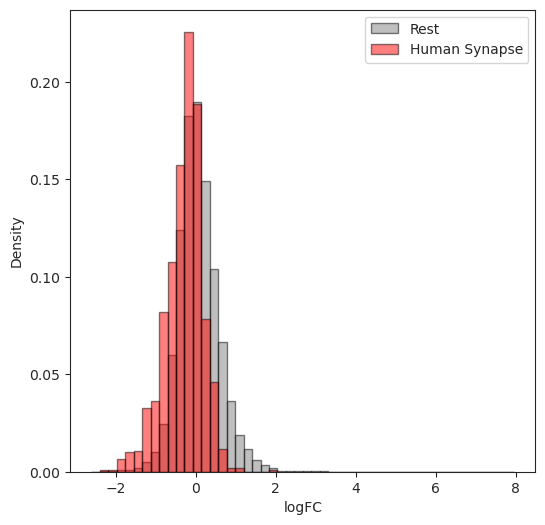

Human Synapse - logFC:
count    1107.000000
mean       -0.298024
std         0.475217
min        -2.355102
25%        -0.559934
50%        -0.224652
75%         0.004115
max         2.009810
Name: logFC, dtype: float64

Rest - logFC:
count    12531.000000
mean         0.067550
std          0.517478
min         -2.608538
25%         -0.254787
50%          0.028060
75%          0.352625
max          7.959986
Name: logFC, dtype: float64
Bin size: 0.211


In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Separate the data for the two groups
human_synapse_data = df[df['group'] == 'Human Synapse']['logFC']
rest_data = df[df['group'] == 'Rest']['logFC']

# Calculate common bins
min_value = min(min(human_synapse_data), min(rest_data))
max_value = max(max(human_synapse_data), max(rest_data))
bins = np.linspace(min_value, max_value, 51)  # 50 bins

# Create the plot
plt.figure(figsize=(6, 6))

# Plot histograms with common bins and black edges
plt.hist(rest_data, bins=bins, alpha=0.5, label='Rest', color='gray',
         weights=np.ones(len(rest_data)) / len(rest_data),
         edgecolor='black', linewidth=1)
plt.hist(human_synapse_data, bins=bins, alpha=0.5, label='Human Synapse', color='red',
         weights=np.ones(len(human_synapse_data)) / len(human_synapse_data),
         edgecolor='black', linewidth=1)

# Add labels
plt.xlabel('logFC')
plt.ylabel('Density')
plt.legend()
#plt.yscale('log')

# Save the plot
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_logFC_histogram.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_synapse_fraction_logFC_histogram.svg', 
            format='svg', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Show plot
plt.show()

# Show plot
#plt.show()

# Print statistics
print("Human Synapse - logFC:")
print(human_synapse_data.describe())
print("\nRest - logFC:")
print(rest_data.describe())

# Calculate and print bin size
bin_size = bins[1] - bins[0]
print(f"Bin size: {bin_size:.3f}")

In [158]:
from scipy import stats
import numpy as np

# Calculate means
mean_human_synapse = np.mean(human_synapse_logFC)
mean_rest = np.mean(rest_logFC)

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(human_synapse_logFC, rest_logFC)

# Calculate effect size (Cohen's d)
mean_diff = mean_human_synapse - mean_rest
n1, n2 = len(human_synapse_logFC), len(rest_logFC)
pooled_std = np.sqrt(((n1 - 1) * np.std(human_synapse_logFC, ddof=1)**2 + 
                      (n2 - 1) * np.std(rest_logFC, ddof=1)**2) / 
                     (n1 + n2 - 2))
cohens_d = mean_diff / pooled_std

# Print results
print(f"Mean human_synapse_logFC: {mean_human_synapse:.4f}")
print(f"Mean rest_logFC: {mean_rest:.4f}")
print(f"Mean difference: {mean_diff:.4f}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f"Cohen's d: {cohens_d}")

Mean human_synapse_logFC: -0.2980
Mean rest_logFC: 0.0675
Mean difference: -0.3656
T-statistic: -22.67522838030898
P-value: 9.064678697657887e-112
Cohen's d: -0.7109848349808524


In [159]:
cx_dmso_lysate_df=pd.read_csv('/tscc/projects/ps-yeolab3/yumei/090524_hipsc_added_seq/rsem_output/CX_LysatevsDMSO_Lysate_results_human_merged.csv')

In [160]:
human_synapse_df = cx_dmso_lysate_df[cx_dmso_lysate_df['gene_id'].isin(human_synapse_genes)]
#print (human_synapse_df)
human_synapse_logFC=human_synapse_df['logFC'].tolist()
print (human_synapse_logFC[:5])

[0.321696267830562, -0.0769038782019064, 0.534698318008083, -0.486559251527599, 0.756843622493772]


In [161]:
all_genes=cx_dmso_lysate_df['gene_id'].tolist()

rest_genes=list(set(all_genes)-set(human_synapse_genes))
print (len(rest_genes))

rest_df = cx_dmso_lysate_df[cx_dmso_lysate_df['gene_id'].isin(rest_genes)]
#print (human_synapse_df)
rest_logFC=rest_df['logFC'].tolist()
print (rest_logFC[:5])

12531
[0.0850416840041587, 0.322174628995107, 0.335637398341074, -0.166624793059721, -0.888585705387821]


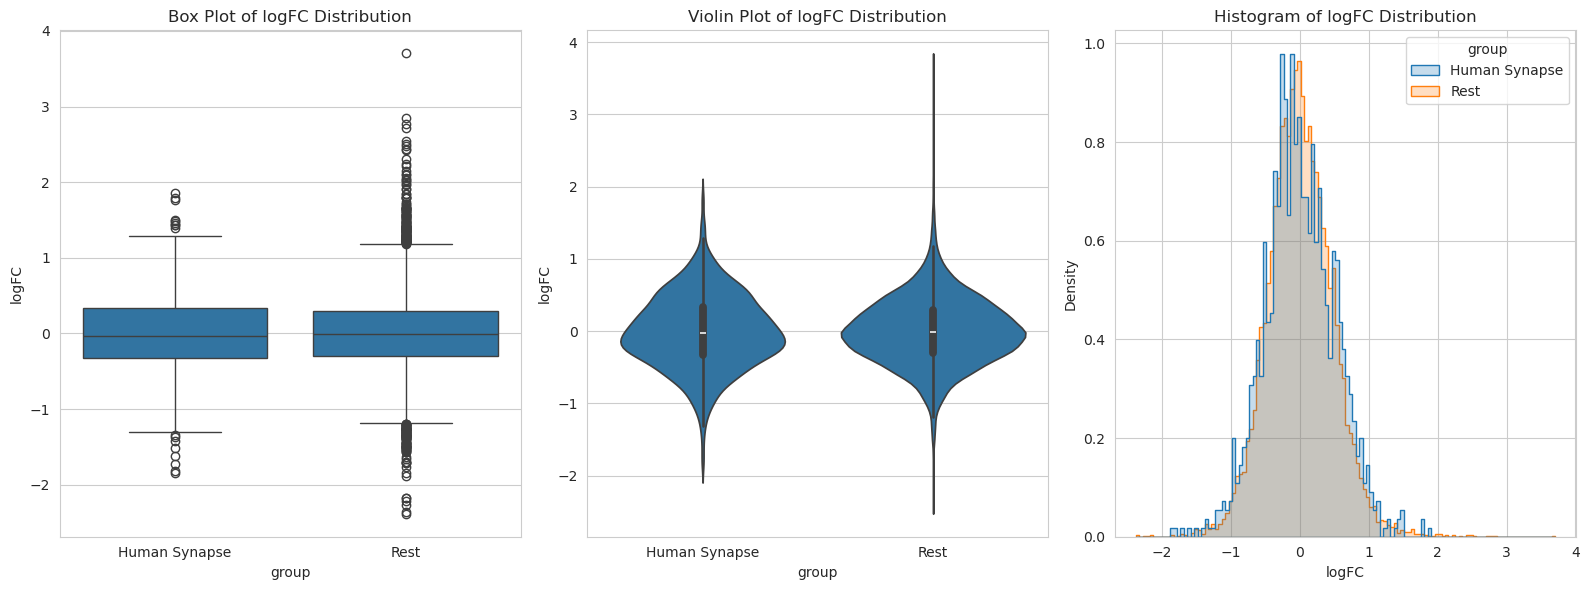

                 count      mean       std       min       25%       50%  \
group                                                                      
Human Synapse   1107.0 -0.004918  0.510751 -1.843933 -0.325341 -0.028399   
Rest           12531.0  0.002383  0.474501 -2.383938 -0.298504 -0.012452   

                    75%       max  
group                              
Human Synapse  0.335273  1.857677  
Rest           0.295749  3.702904  

Independent t-test results:
T-statistic: -0.4875395908462442
P-value: 0.6258838312409263

Effect size:
Cohen's d: -0.015286869429966281


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Set up the plot style
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Create a box plot
plt.subplot(131)
sns.boxplot(x='group', y='logFC', data=df)
#plt.ylim(-4, 13)
plt.title('Box Plot of logFC Distribution')

# Create a violin plot
plt.subplot(132)
sns.violinplot(x='group', y='logFC', data=df)
#plt.ylim(-4, 13)
plt.title('Violin Plot of logFC Distribution')

# Create a histogram
plt.subplot(133)
sns.histplot(data=df, x='logFC', hue='group', element='step', stat='density', common_norm=False)
#plt.xlim(-4, 13)
plt.title('Histogram of logFC Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Additional statistical summary
print(df.groupby('group')['logFC'].describe())

# Perform independent two-sample t-test
from scipy import stats
t_statistic, p_value = stats.ttest_ind(human_synapse_logFC, rest_logFC)
print(f"\nIndependent t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Calculate effect size (Cohen's d)
import numpy as np
mean_diff = np.mean(human_synapse_logFC) - np.mean(rest_logFC)
n1, n2 = len(human_synapse_logFC), len(rest_logFC)
pooled_std = np.sqrt(((n1 - 1) * np.std(human_synapse_logFC, ddof=1)**2 + 
                      (n2 - 1) * np.std(rest_logFC, ddof=1)**2) / 
                     (n1 + n2 - 2))
cohens_d = mean_diff / pooled_std
print(f"\nEffect size:")
print(f"Cohen's d: {cohens_d}")

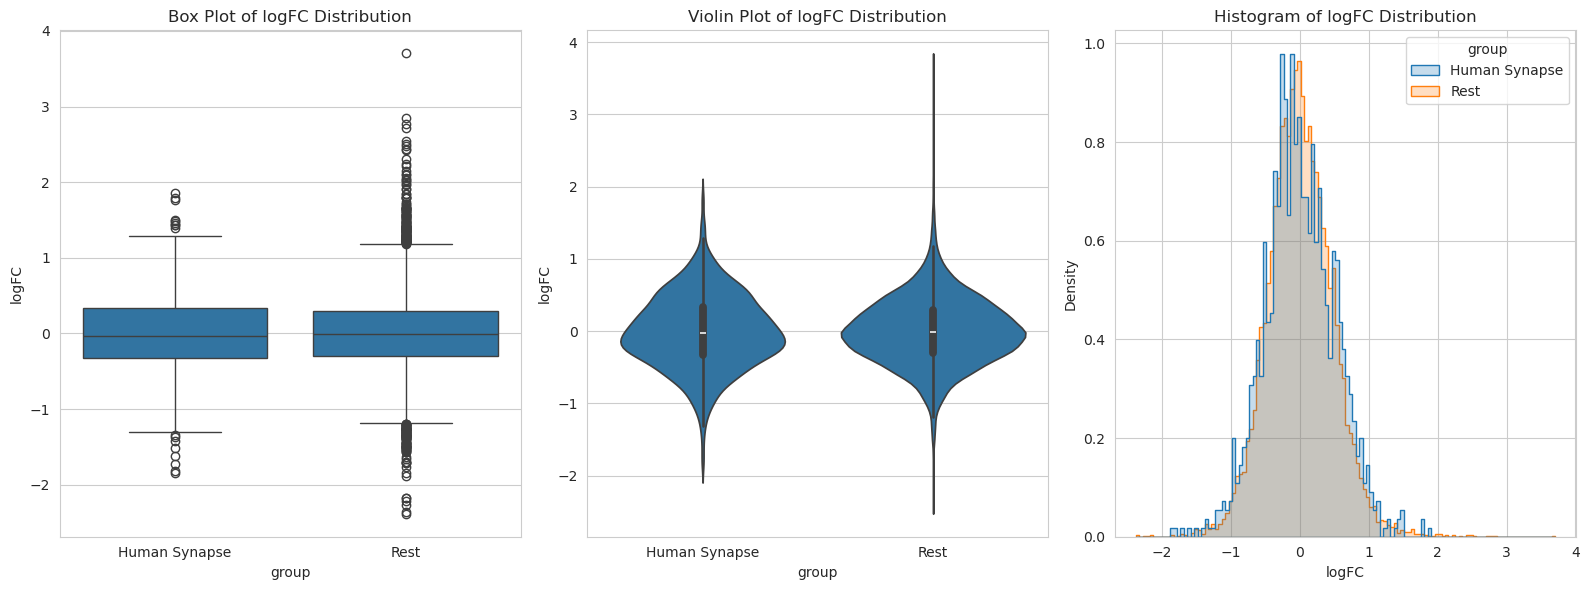

                 count      mean       std       min       25%       50%  \
group                                                                      
Human Synapse   1107.0 -0.004918  0.510751 -1.843933 -0.325341 -0.028399   
Rest           12531.0  0.002383  0.474501 -2.383938 -0.298504 -0.012452   

                    75%       max  
group                              
Human Synapse  0.335273  1.857677  
Rest           0.295749  3.702904  

Independent t-test results:
T-statistic: -0.4875395908462442
P-value: 0.6258838312409263

Mann-Whitney U test results:
Statistic: 6884891.0
P-value: 0.6845216510841231

Effect size:
Cohen's d: -0.015286869429966281


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Set up the plot style
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Create a box plot
plt.subplot(131)
sns.boxplot(x='group', y='logFC', data=df)
plt.title('Box Plot of logFC Distribution')

# Create a violin plot
plt.subplot(132)
sns.violinplot(x='group', y='logFC', data=df)
plt.title('Violin Plot of logFC Distribution')

# Create a histogram
plt.subplot(133)
sns.histplot(data=df, x='logFC', hue='group', element='step', stat='density', common_norm=False)
plt.title('Histogram of logFC Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Additional statistical summary
print(df.groupby('group')['logFC'].describe())

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(human_synapse_logFC, rest_logFC)
print(f"\nIndependent t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Perform Mann-Whitney U test
statistic, mw_pvalue = stats.mannwhitneyu(human_synapse_logFC, rest_logFC, alternative='two-sided')
print(f"\nMann-Whitney U test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {mw_pvalue}")

# Calculate effect size (Cohen's d)
mean_diff = np.mean(human_synapse_logFC) - np.mean(rest_logFC)
n1, n2 = len(human_synapse_logFC), len(rest_logFC)
pooled_std = np.sqrt(((n1 - 1) * np.std(human_synapse_logFC, ddof=1)**2 + 
                      (n2 - 1) * np.std(rest_logFC, ddof=1)**2) / 
                     (n1 + n2 - 2))
cohens_d = mean_diff / pooled_std
print(f"\nEffect size:")
print(f"Cohen's d: {cohens_d}")

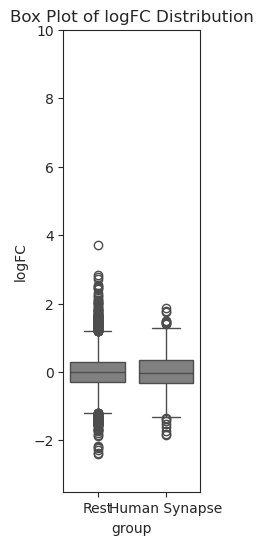

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style
plt.figure(figsize=(6, 6))
sns.set_style("ticks")

# Create a box plot with specified order and gray color
plt.subplot(131)
sns.boxplot(x='group', y='logFC', data=df, order=order, color='gray')  # Added color='gray'

plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5,10)

# Remove grid
plt.grid(False)

# Save as PDF
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_boxplot_logFC.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

/tmp/ipykernel_1975565/2322996033.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)


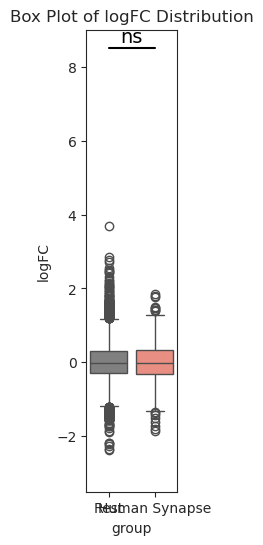

P-value: 6.4675e-01


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Calculate statistics
stat, pvalue = stats.ttest_ind(
    df[df['group'] == 'Human Synapse']['logFC'],
    df[df['group'] == 'Rest']['logFC'],
    equal_var=False  # Use Welch's t-test for unequal variances
)

# Define the order you want
order = ['Rest', 'Human Synapse']

# Set up the plot style
plt.figure(figsize=(4, 6))
sns.set_style("ticks")

# Create a color palette with 'gray' for 'Rest' and 'salmon' for 'Human Synapse'
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}

# Create a box plot with specified order and custom palette
plt.subplot(131)
ax = sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette)
plt.title('Box Plot of logFC Distribution')
plt.ylim(-3.5, 9)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    bar_y = y
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    text_y = bar_y + gap
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=14)
    
# Get current y-axis limits
y_min, y_max = plt.ylim()

# Position the bar at 8.5 (near the top of your y-axis range but inside the limits)
bar_position = 8.5
add_significance_bar(ax, 0, 1, bar_position, pvalue)

# Remove grid
plt.grid(False)

# Save as PDF
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_boxplot_logFC.svg', 
            format='svg', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Display plot
plt.show()

# Print the p-value
print(f"P-value: {pvalue:.4e}")

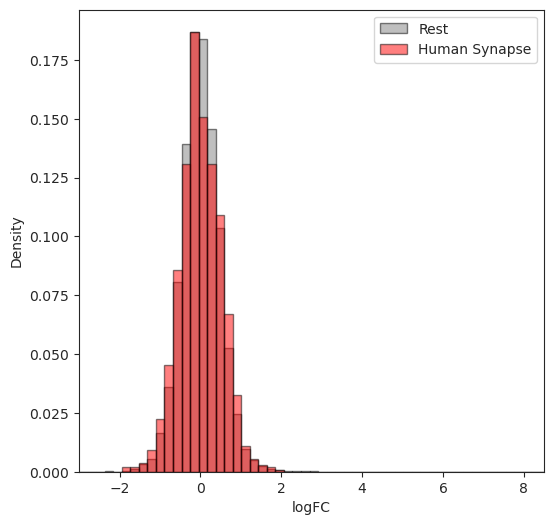

Human Synapse - logFC:
count    1107.000000
mean       -0.004918
std         0.510751
min        -1.843933
25%        -0.325341
50%        -0.028399
75%         0.335273
max         1.857677
Name: logFC, dtype: float64

Rest - logFC:
count    12531.000000
mean         0.002383
std          0.474501
min         -2.383938
25%         -0.298504
50%         -0.012452
75%          0.295749
max          3.702904
Name: logFC, dtype: float64
Bin size: 0.211


In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': human_synapse_logFC + rest_logFC,
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Separate the data for the two groups
human_synapse_data = df[df['group'] == 'Human Synapse']['logFC']
rest_data = df[df['group'] == 'Rest']['logFC']

# Create bins with size 0.211
min_value = -3
max_value = 8.5
bins = np.arange(min_value, max_value + 0.211, 0.211)

# Create the plot
plt.figure(figsize=(6, 6))

# Plot histograms with common bins and black edges
plt.hist(rest_data, bins=bins, alpha=0.5, label='Rest', color='gray',
         weights=np.ones(len(rest_data)) / len(rest_data),
         edgecolor='black', linewidth=1)  # Added black edges
plt.hist(human_synapse_data, bins=bins, alpha=0.5, label='Human Synapse', color='red',
         weights=np.ones(len(human_synapse_data)) / len(human_synapse_data),
         edgecolor='black', linewidth=1)  # Added black edges

# Add labels
plt.xlabel('logFC')
plt.ylabel('Density')
plt.legend()
plt.xlim(-3, 8.5)
#plt.yscale('log')

# Save the plot
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_logFC_histogram.pdf', 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Save the plot
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_logFC_histogram.svg', 
            format='svg', 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

# Show plot
plt.show()

# Print statistics
print("Human Synapse - logFC:")
print(human_synapse_data.describe())
print("\nRest - logFC:")
print(rest_data.describe())

# Calculate and print bin size to verify
bin_size = bins[1] - bins[0]
print(f"Bin size: {bin_size:.3f}")

/tmp/ipykernel_1975565/3702221674.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
/tmp/ipykernel_1975565/3702221674.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)
/tmp/ipykernel_1975565/3702221674.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


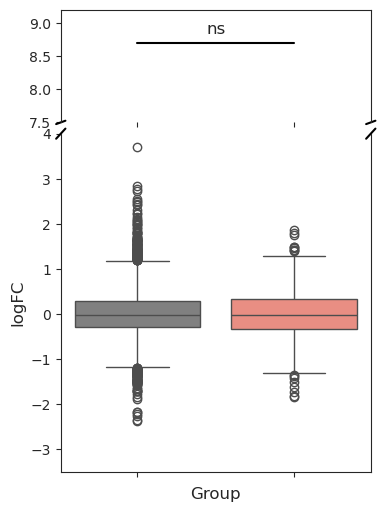

P-value: 6.2588e-01


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Combine the data into a single DataFrame
df = pd.DataFrame({
    'logFC': np.concatenate([human_synapse_logFC, rest_logFC]),
    'group': ['Human Synapse'] * len(human_synapse_logFC) + ['Rest'] * len(rest_logFC)
})

# Define the order you want
order = ['Rest', 'Human Synapse']
palette = {'Rest': 'gray', 'Human Synapse': 'salmon'}

# Calculate p-value
rest_data = df[df['group'] == 'Rest']['logFC']
synapse_data = df[df['group'] == 'Human Synapse']['logFC']
stat, p_value = stats.ttest_ind(rest_data, synapse_data)

# Create two subplots that share the x-axis with tighter spacing
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(4, 6),
                                       gridspec_kw={'height_ratios': [1, 3], 
                                                   'hspace': 0.05})  # Reduce vertical space between plots

# Plot the boxplot in both axes
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_top)
sns.boxplot(x='group', y='logFC', data=df, order=order, palette=palette, ax=ax_bottom)

# Set y-axis limits for the two subplots - adjust top limit to make room for sig bar
ax_top.set_ylim(7.5, 9.2)    # For the outlier region (increased upper limit)
ax_bottom.set_ylim(-3.5, 4)  # For the main distribution

# Remove the spines between the plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)  # don't show tick labels on the top plot
ax_bottom.xaxis.tick_bottom()

# Add diagonal break marks
d = 0.015  # size of the break marks in axes coordinates
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left break mark
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)    # top-right break mark
kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left break mark
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right break mark

# Add a significance bar to the top plot above the outlier
x1, x2 = 0, 1  # Positions for the groups on the x-axis
y = 8.7  # Position for significance bar (above the outlier in the top plot)
ax_top.plot([x1, x2], [y, y], lw=1.5, c='black')  # Horizontal line

# Add significance text
if p_value < 0.001:
    text = "***"
elif p_value < 0.01:
    text = "**"
elif p_value < 0.05:
    text = "*"
else:
    text = "ns"
ax_top.text((x1 + x2) / 2, y + 0.1, text, ha='center', va='bottom', fontsize=12)

# Only show y-axis label on bottom plot
ax_top.set_ylabel('')
ax_bottom.set_ylabel('logFC', fontsize=12)

# Remove x-axis label from top plot
ax_top.set_xlabel('')

# Hide x-tick labels on top plot
ax_top.set_xticklabels([])

# Set x-label on bottom plot
ax_bottom.set_xlabel('Group', fontsize=12)

# Remove grid on both plots
ax_top.grid(False)
ax_bottom.grid(False)

# Adjust tick label size
ax_bottom.tick_params(axis='both', which='major', labelsize=10)
ax_top.tick_params(axis='y', which='major', labelsize=10)

# Tight layout
plt.tight_layout()

# Save if needed
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/activity_translation_hipsc/090524_hipsc/output_files/human_CX_lysate_fraction_boxplot_logFC.svg', 
             format='svg', 
            dpi=300, 
             bbox_inches='tight',
             transparent=True)

plt.show()

# Print the p-value
print(f"P-value: {p_value:.4e}")